# Linear Regression
### 線形回帰
▶ データの分布を線によって表現  
▶ 最も簡単な例では入力Xに対してその予測値yを  
$ y = aX + b $  
とし、この最適なパラメータ（a,b）を求めることが課題

### 最適パラメータの定義
▶ 通常、「最小二乗法（Least square method)」を使ってパラメータを決定  
▶ 実際のデータと予測値との平均二乗誤差（Mean square Error）が最小になるようにパラメータを調整  
▶勾配降下法
  

### 単回帰と重回帰
#### 単回帰
$ y = w_0 + w_1X $

#### 重回帰 ・・・ ２つ以上の入力からの予測
$ y = w_0 + w_1X_1 + w_2X_2 + ... + w_nX_n $

## 実装

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.random.rand(100, 1)
y = 5 + 3 * X + np.random.rand(100,1)

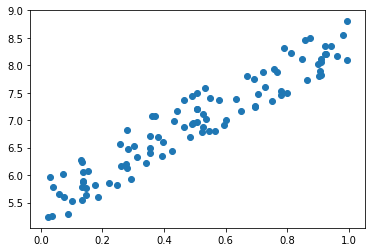

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lin_reg = LinearRegression().fit(X, y.ravel())

In [6]:
print('切片: ' + str(lin_reg.intercept_))
print('傾き: '+ str(lin_reg.coef_))

切片: 5.475798255084669
傾き: [2.97156526]


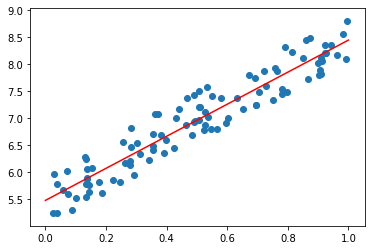

In [7]:
X_new = np.array([[0], [1]])
plt.plot(X_new, lin_reg.intercept_ + lin_reg.coef_ * X_new, 'red')
plt.scatter(X, y)

In [8]:
##勾配降下法
from sklearn.linear_model import SGDRegressor

In [9]:
sgd_reg = SGDRegressor(max_iter=100).fit(X, y.ravel())

In [10]:
print('切片: ' + str(sgd_reg.intercept_))
print('傾き: '+ str(sgd_reg.coef_))

切片: [5.44962895]
傾き: [2.97163125]


In [11]:
##学習率を下げる
sgd_reg_00001 = SGDRegressor(eta0=0.0001, max_iter=100)
sgd_reg_00001.fit(X, y.ravel())

/home/kosuke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [12]:
print('切片: ' + str(sgd_reg_00001.intercept_))
print('傾き: '+ str(sgd_reg_00001.coef_))

切片: [0.85321247]
傾き: [0.45551534]


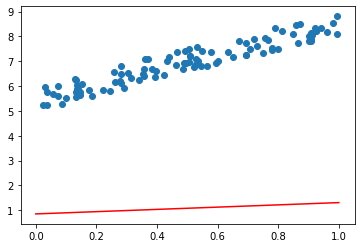

In [13]:
plt.plot(X_new, sgd_reg_00001.intercept_ + sgd_reg_00001.coef_ * X_new, 'red')
plt.scatter(X, y)

### 正則化・・・Overfittingを防ぐ
#### Ridge回帰・・・係数の絶対値を縮小する
#### Lasso回帰・・・いくつかの係数を０にする

In [14]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import mglearn 
from sklearn.model_selection import train_test_split

In [15]:
X, y = mglearn.datasets.load_extended_boston()

In [16]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868


In [17]:
print(df_X.shape)
print(df_y.shape)

(506, 104)
(506, 1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(379, 104)
(127, 104)


In [19]:
def print_score(model):
    print(round(model.score(X_train, y_train), 3))
    print(round(model.score(X_test, y_test), 3))

In [20]:
from sklearn.linear_model import Ridge, Lasso

In [21]:
lin_reg.fit(X_train,y_train)
print_score(lin_reg)

0.952
0.607


In [22]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print_score(ridge)

0.928
0.772


In [23]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print_score(lasso)

0.896
0.768
